In [1]:
import pandas as pd 
import numpy as np
from scipy.stats import norm
import sys 
import os

sys.path.append('../data/')
sys.path.append('../models/')
from falsifier import Falsifier
from baselines import MetaAnalyzer, EvolvedMetaAnalyzer, SimpleBaseline
from estimator import CATE
from DataModule import DataModule

In [81]:
path = './mmr_results/fig1_v2/'
filenames = {
    'ATE': 'ATE-rct3-C0-v2-strong-confounding.csv', 
    'GATE': 'GATE-rct3-C0-v2-strong-confounding.csv', 
    'MMR-Contrast': 'MMR-Contrast-KEOPS-rct3-C0-v2-strong-confounding.csv'
    # 'ATE': 'ATE-rct3-C0-v2.csv', 
    # 'GATE': 'GATE-rct3-C0-v2.csv', 
    # 'MMR-Contrast': 'MMR-Contrast-KEOPS-rct3-C0-v2.csv'
}
full_paths = {k:os.path.join(path,filenames[k]) for k in filenames.keys()}
dfs_level = {k:pd.read_csv(full_paths[k]) for k in full_paths.keys()}
dfs_level['MMR-Contrast']

filenames = {
    'ATE': 'ATE-rct3-C1-v2-strong-confounding.csv', 
    'GATE': 'GATE-rct3-C1-v2-strong-confounding.csv', 
    'MMR-Contrast': 'MMR-Contrast-KEOPS-rct3-C1-v2-strong-confounding.csv'
    # 'ATE': 'ATE-rct3-C1-v2.csv', 
    # 'GATE': 'GATE-rct3-C1-v2.csv', 
    # 'MMR-Contrast': 'MMR-Contrast-KEOPS-rct3-C1-v2.csv'
}
full_paths = {k:os.path.join(path,filenames[k]) for k in filenames.keys()}
dfs_power = {k:pd.read_csv(full_paths[k]) for k in full_paths.keys()}
dfs_power['MMR-Contrast']

,Unnamed: 0,iter,obs_study_num,obs_study_size,p_val,reject
0,0,0,1,3.0,0.019802,1
1,1,0,2,4.0,0.009901,1
2,2,0,3,5.0,0.009901,1
3,3,0,4,7.0,0.029703,1
4,4,0,5,10.0,0.019802,1
...,...,...,...,...,...,...
495,495,99,1,3.0,0.019802,1
496,496,99,2,4.0,0.029703,1
497,497,99,3,5.0,0.009901,1
498,498,99,4,7.0,0.039604,1


In [82]:
sample_sizes = [3,4,5,7,10]
rej_mean_mmr_level = []
rej_mean_mmr_power = []
rej_mean_ate_level = []
rej_mean_ate_power = []
rej_mean_gate_level = []
rej_mean_gate_power = []

for size in sample_sizes: 
    rej_mean_ate_level.append(dfs_level['ATE'][dfs_level['ATE']['obs_study_size'] == size]['reject'].mean())
    rej_mean_mmr_level.append(dfs_level['MMR-Contrast'][dfs_level['MMR-Contrast']['obs_study_size'] == size]['reject'].mean())
    rej_mean_gate_level.append(dfs_level['GATE'][dfs_level['GATE']['obs_study_size'] == size]['reject'].mean())
    rej_mean_ate_power.append(dfs_power['ATE'][dfs_power['ATE']['obs_study_size'] == size]['reject'].mean())
    rej_mean_mmr_power.append(dfs_power['MMR-Contrast'][dfs_power['MMR-Contrast']['obs_study_size'] == size]['reject'].mean())
    rej_mean_gate_power.append(dfs_power['GATE'][dfs_power['GATE']['obs_study_size'] == size]['reject'].mean())

print(sample_sizes)
rej_mean_gate_level = np.array(rej_mean_gate_level)+0.001
print(rej_mean_ate_level)
print(rej_mean_gate_level)
print(rej_mean_mmr_level)
rej_mean_gate_power = np.array(rej_mean_gate_power)+0.001
print(rej_mean_ate_power)
print(rej_mean_gate_power)
print(rej_mean_mmr_power)


[3, 4, 5, 7, 10]
[0.01, 0.01, 0.01, 0.0, 0.0]
[0.001 0.001 0.001 0.001 0.001]
[0.04, 0.05, 0.06, 0.01, 0.07]
[0.76, 0.76, 0.78, 0.7, 0.7]
[0.101 0.071 0.081 0.041 0.011]
[0.76, 0.84, 0.88, 0.72, 0.88]


In [83]:
sample_sizes

[3, 4, 5, 7, 10]

In [5]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

## alternate font/graph format
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rc('font', weight='heavy')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('axes', labelsize='x-large')

In [85]:
sample_sizes = np.array(sample_sizes)/3.


In [46]:
cp = sns.color_palette('colorblind')
cp

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

<ipython-input-86-ae2073f9507a>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)
<ipython-input-86-ae2073f9507a>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)


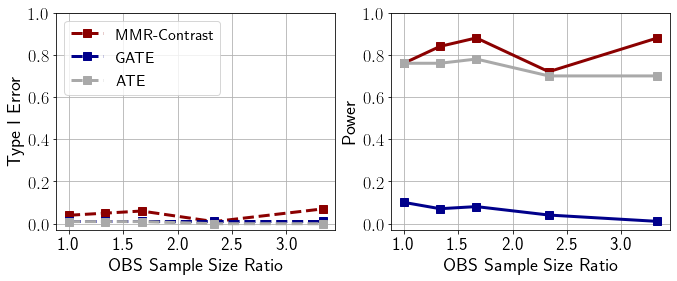

In [86]:
fig, axlist = plt.subplots(1,2,figsize=(11,4))
axs = axlist.ravel()


axs[0].plot(sample_sizes, rej_mean_mmr_level, label='MMR-Contrast', linewidth=3, linestyle='--', color='darkred', marker='s', ms=8)
axs[0].plot(sample_sizes, rej_mean_gate_level+0.01, label='GATE', linewidth=3, linestyle='--', color='darkblue', marker='s', ms=8)
axs[0].plot(sample_sizes, rej_mean_ate_level, label='ATE', linewidth=3, linestyle='--', color='darkgray', marker='s', ms=8)
axs[1].plot(sample_sizes, rej_mean_mmr_power, label='MMR-Contrast', linewidth=3, linestyle='-', color='darkred', marker='s', ms=8)
axs[1].plot(sample_sizes, rej_mean_gate_power, label='GATE', linewidth=3, linestyle='-', color='darkblue', marker='s', ms=8)
axs[1].plot(sample_sizes, rej_mean_ate_power, label='ATE', linewidth=3, linestyle='-', color='darkgray', marker='s', ms=8)
axs[0].legend(fontsize=16, loc='upper left')
# axs[1].legend(fontsize=14)
axs[0].set_xlabel('OBS Sample Size Ratio', fontsize=19)
axs[1].set_xlabel('OBS Sample Size Ratio', fontsize=19)
axs[0].set_ylabel('Type I Error', fontsize=19)
axs[1].set_ylabel('Power', fontsize=19)
axs[0].set_ylim(-0.03,1.)
axs[1].set_ylim(-0.03,1.)
axs[0].tick_params(axis='y', labelsize=18)
axs[1].tick_params(axis='y', labelsize=18)
# axs[0].tick_params(axis='x', labelsize=16)
# axs[1].tick_params(axis='x', labelsize=16)
axs[0].set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)
axs[1].set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)

axs[0].grid()
axs[1].grid()
fig.savefig('./mmr_results/fig1b-v2.pdf',bbox_inches='tight')


In [14]:
path = './mmr_results/debug/'
files = os.listdir(path)

wparams = np.arange(-3.,7.5,0.5)
wparam_dict = {}
for wparam in wparams: 
    file_ate_power = f'ATE-power-{wparam}.csv'
    file_mmr_power = f'MMR-power-{wparam}.csv'
    file_mmr_level = f'MMR-level-{wparam}.csv'

    ate_power = pd.read_csv(os.path.join(path, file_ate_power))
    mmr_power = pd.read_csv(os.path.join(path, file_mmr_power))
    mmr_level = pd.read_csv(os.path.join(path, file_mmr_level))
    
    wparam_dict[wparam] = {
        'ate-power': ate_power['reject'].mean(), 
        'mmr-power': mmr_power['reject'].mean(), 
        'mmr-level': mmr_level['reject'].mean()
    }

import pprint 
pprint.pprint(wparam_dict)




{-3.0: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 -2.5: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 -2.0: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 -1.5: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 -1.0: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 -0.5: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 0.0: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 0.5: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 1.0: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 1.5: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 2.0: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 2.5: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 3.0: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 3.5: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 1.0},
 4.0: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 0.9},
 4.5: {'ate-power': 1.0, 'mmr-level': 0.0, 'mmr-power': 0.7},
 5

In [16]:
path = './mmr_results/fig2/'
filenames = {
    'psi-hat': 'mmr-psi-hat-bugfix.csv', 
    'psi-oracle': 'mmr-psi-oracle-bugfix.csv'
}
full_paths = {k:os.path.join(path,filenames[k]) for k in filenames.keys()}
dfs = {k:pd.read_csv(full_paths[k]) for k in full_paths.keys()}
dfs['psi-oracle']

,Unnamed: 0,iter,obs_study_num,obs_study_size,p_val,reject
0,0,0,1,0.05,0.009901,1
1,1,0,2,0.10,0.801980,0
2,2,0,3,1.00,0.722772,0
3,3,0,4,3.00,0.059406,0
4,4,0,5,5.00,0.663366,0
...,...,...,...,...,...,...
495,495,99,1,0.05,0.910891,0
496,496,99,2,0.10,0.039604,1
497,497,99,3,1.00,0.099010,0
498,498,99,4,3.00,0.712871,0


In [19]:
sample_sizes = [.05,1.,3.,5.,10.]
rej_mean_mmr_hat = []
rej_mean_mmr_oracle = []


for size in sample_sizes: 
    rej_mean_mmr_hat.append(dfs['psi-hat'][dfs['psi-hat']['obs_study_size'] == size]['reject'].mean())
    rej_mean_mmr_oracle.append(dfs['psi-oracle'][dfs['psi-oracle']['obs_study_size'] == size]['reject'].mean())

print(sample_sizes)
print(rej_mean_mmr_hat)
print(rej_mean_mmr_oracle)

[0.05, 1.0, 3.0, 5.0]
[0.39, 0.1, 0.09, 0.08]
[0.07, 0.01, 0.02, 0.03]


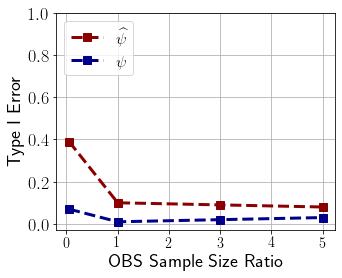

In [21]:
fig, axs = plt.subplots(1,1,figsize=(5,4))
axs.plot(sample_sizes, rej_mean_mmr_hat, label='$\widehat{\psi}$', linewidth=3, linestyle='--', color='darkred', marker='s', ms=8)
axs.plot(sample_sizes, rej_mean_mmr_oracle, label='$\psi$', linewidth=3, linestyle='--', color='darkblue', marker='s', ms=8)
axs.legend(fontsize=16, loc='upper left')
# axs.legend(fontsize=14)
axs.set_xlabel('OBS Sample Size Ratio', fontsize=19)
axs.set_ylabel('Type I Error', fontsize=19)
axs.set_ylim(-0.03,1.)
axs.tick_params(axis='y', labelsize=18)
# axs.tick_params(axis='x', labelsize=16)
# axs.tick_params(axis='x', labelsize=16)
# axs.set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)
# axs.set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)

axs.grid()
fig.savefig('./mmr_results/fig2.pdf',bbox_inches='tight')

# Visualizing Witness Function for Semi-Synthetic Data

In [90]:
path = './mmr_results/fig3/wf-ss-round2.csv'
df_birth = pd.read_csv(path)
df_birth
path = './mmr_results/fig3/wf-ss-round3.csv'
df_nnh = pd.read_csv(path)
df_nnh 

,Unnamed: 0,iter,obs_study_num,obs_study_size,p_val,reject,f_coord_pos,f_coord_neg,x_coord_pos,x_coord_neg,covariate_names
0,0,0,1,5.0,0.425743,0,[-0.63328448 -0.63257406 -0.63198952 -0.631530...,[-0.752436 -0.7512615 -0.7502158 -0.749298...,[ 15. 16.23232323 17.46464646 18.69...,[ 15. 16.23232323 17.46464646 18.69...,"['nnhealth', 'booze']"
1,1,1,1,5.0,0.415842,0,[ 2.99522975e+00 2.94696571e+00 2.89896724e+...,[ 2.91256701 2.8640616 2.81582037 2.767842...,[ 15. 16.23232323 17.46464646 18.69...,[ 15. 16.23232323 17.46464646 18.69...,"['nnhealth', 'booze']"
2,2,2,1,5.0,0.346535,0,[ 0.22490805 0.21784911 0.21085835 0.203935...,[ 0.12478402 0.11811843 0.11151813 0.104982...,[ 15. 16.23232323 17.46464646 18.69...,[ 15. 16.23232323 17.46464646 18.69...,"['nnhealth', 'booze']"


In [91]:
df = df_birth[df_birth['iter'] == 1]
f_coord_pos_bi = [ np.fromstring(x_str.strip('[]'), sep=' ') for x_str in df['f_coord_pos'].values ][0]
f_coord_neg_bi = [ np.fromstring(x_str.strip('[]'), sep=' ') for x_str in df['f_coord_neg'].values ][0]
x_coord_pos_bi = [ np.fromstring(x_str.strip('[]'), sep=' ') for x_str in df['x_coord_pos'].values ][0]
x_coord_neg_bi = [ np.fromstring(x_str.strip('[]'), sep=' ') for x_str in df['x_coord_neg'].values ][0]
cov_names = df['covariate_names']
print(cov_names)

df = df_nnh[df_nnh['iter'] == 1]
f_coord_pos_nnh = [ np.fromstring(x_str.strip('[]'), sep=' ') for x_str in df['f_coord_pos'].values ][0]
f_coord_neg_nnh = [ np.fromstring(x_str.strip('[]'), sep=' ') for x_str in df['f_coord_neg'].values ][0]
x_coord_pos_nnh = [ np.fromstring(x_str.strip('[]'), sep=' ') for x_str in df['x_coord_pos'].values ][0]
x_coord_neg_nnh = [ np.fromstring(x_str.strip('[]'), sep=' ') for x_str in df['x_coord_neg'].values ][0]
cov_names = df['covariate_names']
print(cov_names)



1    ['birth.o', 'booze']
Name: covariate_names, dtype: object
1    ['nnhealth', 'booze']
Name: covariate_names, dtype: object


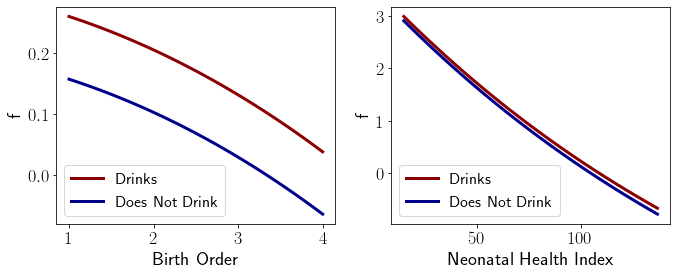

In [93]:
fig, axlist = plt.subplots(1,2,figsize=(11,4))
axs = axlist.ravel()

axs[0].plot(x_coord_pos_bi, f_coord_pos_bi, label='Drinks', linewidth=3, linestyle='-', color='darkred')
axs[0].plot(x_coord_neg_bi, f_coord_neg_bi, label='Does Not Drink', linewidth=3, linestyle='-', color='darkblue')
axs[0].legend(fontsize=16, loc='lower left')
# axs[0].legend(fontsize=14)
axs[0].set_xlabel('Birth Order', fontsize=19)
axs[0].set_ylabel('f', fontsize=19)
# axs[0].set_ylim(-0.1,.3)
axs[0].tick_params(axis='y', labelsize=18)
axs[0].tick_params(axis='x', labelsize=18)
# axs[0].tick_params(axis='x', labelsize=16)
# axs[0].set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)
# axs[0].set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)

axs[1].plot(x_coord_pos_nnh, f_coord_pos_nnh, label='Drinks', linewidth=3, linestyle='-', color='darkred')
axs[1].plot(x_coord_neg_nnh, f_coord_neg_nnh, label='Does Not Drink', linewidth=3, linestyle='-', color='darkblue')
axs[1].legend(fontsize=16, loc='lower left')
# axs[1].legend(fontsize=14)
axs[1].set_xlabel('Neonatal Health Index', fontsize=19)
axs[1].set_ylabel('f', fontsize=19)
# axs[1].set_ylim(-0.1,.3)
axs[1].tick_params(axis='y', labelsize=18)
axs[1].tick_params(axis='x', labelsize=18)
# axs[1].tick_params(axis='x', labelsize=16)
# axs[1].set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)
# axs[1].set_xticklabels([0.,1.0,1.5,2.0,2.5,3.0], fontsize=18)

fig.savefig('./mmr_results/fig3.pdf',bbox_inches='tight')

# WHI Experiment (Table 1)

In [20]:
path = './whi_results/fig4-power-sel15'
filenames = os.listdir(path)
files = [os.path.join(path,file) for file in filenames]
ate_files = [file for file in files if '/ATE_' in file]
gate_files = [file for file in files if '/GATE_' in file]
mmr_files = [file for file in files if '/MMR-Contrast' in file]
print(ate_files)
print(gate_files)
print(mmr_files)


['./whi_results/fig4-power-sel15/ATE_seed38.csv', './whi_results/fig4-power-sel15/ATE_seed44.csv', './whi_results/fig4-power-sel15/ATE_seed43.csv', './whi_results/fig4-power-sel15/ATE_seed31.csv', './whi_results/fig4-power-sel15/ATE_seed36.csv', './whi_results/fig4-power-sel15/ATE_seed0.csv', './whi_results/fig4-power-sel15/ATE_seed7.csv', './whi_results/fig4-power-sel15/ATE_seed9.csv', './whi_results/fig4-power-sel15/ATE_seed15.csv', './whi_results/fig4-power-sel15/ATE_seed12.csv', './whi_results/fig4-power-sel15/ATE_seed27.csv', './whi_results/fig4-power-sel15/ATE_seed20.csv', './whi_results/fig4-power-sel15/ATE_seed29.csv', './whi_results/fig4-power-sel15/ATE_seed37.csv', './whi_results/fig4-power-sel15/ATE_seed30.csv', './whi_results/fig4-power-sel15/ATE_seed42.csv', './whi_results/fig4-power-sel15/ATE_seed39.csv', './whi_results/fig4-power-sel15/ATE_seed45.csv', './whi_results/fig4-power-sel15/ATE_seed28.csv', './whi_results/fig4-power-sel15/ATE_seed21.csv', './whi_results/fig4-po

In [21]:
rej_ate = []
for file in ate_files: 
    df = pd.read_csv(file)
    rej_ate.append(df['reject'].values[0])
print(np.mean(rej_ate))

rej_gate = []
for file in gate_files: 
    df = pd.read_csv(file)
    m = df['reject'].mean()
    rej_gate.append(m)
print(np.mean(rej_gate))

rej_mmr = []
for file in mmr_files: 
    df = pd.read_csv(file)
    m = df['reject'].mean()
    rej_mmr.append(m)
print(np.mean(rej_mmr))



0.98
0.907741935483871
1.0
